## Here we are importing some important libraries.

In [1]:
import pandas as pd
import numpy as np
import sys

## Now we are using pandas library and importing dataset here. Also checking type of dataset, all the avaiable columns and how many rows and columns present there.

In [2]:
df= pd.read_csv('/content/Data Analyst munnar Dataset.csv')
# Pandas objects - Series and DataFrames
print(type(df))
print(df.columns)
print(df.shape)         # Records and attributes

<class 'pandas.core.frame.DataFrame'>
Index(['Hotel Name\t\t\t\t\t\t\t\t\t', 'Rating', 'Rating Description',
       'Reviews', 'Star Rating', 'Location', 'Nearest Landmark',
       'Distance to Landmark', 'Price', 'Tax'],
      dtype='object')
(74, 10)


## Here we are checking information about dataset and also what is the size for available dataset. Also we are printing dataset index wise with starting 5 rows.

In [3]:
df.info()
print(sys.getsizeof(df))             ##### Data glimpse
print(df.index)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name									   74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.9+ KB
36974
RangeIndex(start=0, stop=74, step=1)


,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


## As we found that we have some discrepency available in dataset like column name 'Hotel is with extra tab'. Also we can see that Price, Tax, Distance to Landmark should be integer or float data type but it is in object we have to make the correction.

In [4]:
df.rename(columns= {'Hotel Name\t\t\t\t\t\t\t\t\t': 'Hotel Name'}, inplace = True)
df.columns
df.head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


## As you can see above that the columns 'Hotel Name' changed properly but data types are same. We need to change that as well. Now suppose we are trying to change the index in our dataset with 'Hotel Name'. So it'll set hotel name as per detail.

In [5]:
df.index = df['Hotel Name']

## Now let's see if we want to see the hotel available in 3rd row with proper details.

In [6]:
df.iloc[2]

Hotel Name                Issacs Residency
Rating                                 4.1
Rating Description               Very Good
Reviews                                322
Star Rating                            3.0
Location                   Central Munnar 
Nearest Landmark        Attukal Waterfalls
Distance to Landmark                950 m 
Price                                2,758
Tax                                    684
Name: Issacs Residency, dtype: object

## We are resetting index and dropping current hotel fromm index so it can be in the same phase.

In [7]:
df.reset_index(drop = True, inplace = True)

In [8]:
print(df.loc[3])

Hotel Name              Tea Valley Resort
Rating                                4.3
Rating Description              Excellent
Reviews                              1337
Star Rating                           4.0
Location                      Pallivasal 
Nearest Landmark              city centre
Distance to Landmark              4.8 km 
Price                               2,675
Tax                                   756
Name: 3, dtype: object


## This time we want to know how much time it's taking inorder to check the null value using info() function.

In [9]:
from timeit import default_timer as timer
start = timer()
df.info()
print(timer() - start)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.9+ KB
0.008875929999703658


## Here we are checking how many unique values are there available in dataset.

In [10]:
df.nunique()

Hotel Name              74
Rating                  18
Rating Description       4
Reviews                 70
Star Rating              4
Location                22
Nearest Landmark         2
Distance to Landmark    57
Price                   72
Tax                     70
dtype: int64

## So this time we are checking how much time it takes in order to check null value separate column.

In [11]:
start = timer()
print(df['Star Rating'].isna().sum())   ### Note that there are 17 Nulls or no values
print(timer() - start)

17
0.0017379230012011249


## As we checked above it took very less time in order to check null values separately. Also this time we have to convert data type for 'Tax' from object to float because tax always in numbers.

In [12]:
df['Tax'].astype('float64')    ## Gives error why?

ValueError: could not convert string to float: '1,141'

## We tried to change data type but it didn't work because in 'Tax' there's number available which contain comma in it you can see example below.

In [13]:
df['Tax']

0       574
1       969
2       684
3       756
4       654
      ...  
69    2,178
70      684
71      808
72    2,124
73      223
Name: Tax, Length: 74, dtype: object

## So as we got the problem and in order to fix that we have to remove the comma from price. For that we are going to use lambda function which will take price as inout (x) then with the help of replace function we are replacing comma with nothing which is like this (",", ""). Also we are using apply function for getting it done.

In [14]:
# Some data pre processing
print(type(df['Tax'].iloc[0]))
df['Tax'] = df['Tax'].apply(lambda x: str(x))
df['Tax']= df['Tax'].apply(lambda x: x.replace(",", ""))
df['Tax'] = df['Tax'].astype('float64')
df['Tax']

<class 'str'>


0      574.0
1      969.0
2      684.0
3      756.0
4      654.0
       ...  
69    2178.0
70     684.0
71     808.0
72    2124.0
73     223.0
Name: Tax, Length: 74, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 5.9+ KB


## As we can see above that now data type of 'Tax' changed to float which was before Object. We have to perform same task inorder to change data tyoe for other columns as well.

In [16]:
df['Price'].astype('float64')

ValueError: could not convert string to float: '2,728'

In [17]:
df['Price'] = df['Price'].apply(lambda x: str(x))
df['Price']= df['Price'].apply(lambda x: x.replace(",", ""))
df['Price'] = df['Price'].astype('float64')
df['Price']

0     2728.0
1     4451.0
2     2758.0
3     2675.0
4     3203.0
       ...  
69    8103.0
70    3317.0
71    3953.0
72    6862.0
73    1014.0
Name: Price, Length: 74, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     float64
 9   Tax                   72 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 5.9+ KB


In [19]:
df['Distance to Landmark']

0     10.2 km 
1     19.2 km 
2       950 m 
3      4.8 km 
4      1.9 km 
        ...   
69    13.2 km 
70    20.6 km 
71     5.8 km 
72     6.6 km 
73     1.3 km 
Name: Distance to Landmark, Length: 74, dtype: object

## As we can see we have 'Distance to Landmark' in km and m as well. So we need to convert that in km inorder to standardized the data.

In [20]:
df['Distance to Landmark'].astype('float64')

ValueError: could not convert string to float: '10.2 km '

## While we are trying to change the data type it's giving error there because of that only we have data in km and m as well. So we are going to convert m to km only in order to fix.

In [21]:
def get_dist_in_km(x):
    if x.split()[1] == 'm':
        return float(x.split()[0])/1000
    elif x.split()[1] == 'km':
        return x.split()[0]

df['Distance to Landmark'] = df['Distance to Landmark'].apply(get_dist_in_km)

In [22]:
df['Distance to Landmark']

0     10.2
1     19.2
2     0.95
3      4.8
4      1.9
      ... 
69    13.2
70    20.6
71     5.8
72     6.6
73     1.3
Name: Distance to Landmark, Length: 74, dtype: object

In [23]:
df

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2,2728.0,574.0
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2,4451.0,969.0
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,0.95,2758.0,684.0
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8,2675.0,756.0
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9,3203.0,654.0
...,...,...,...,...,...,...,...,...,...,...
69,The Fog Munnar (Resort & Spa),4.5,Excellent,292,5.0,Ettycity Road,city centre,13.2,8103.0,2178.0
70,Skylark Holidays | Rooms & Caretaker,4.1,Very Good,17,NaN,Chinnakanal,city centre,20.6,3317.0,684.0
71,Deshadan Mountain Resort- The highest resort i...,4.3,Excellent,395,4.0,Pallivasal,city centre,5.8,3953.0,808.0
72,Nature Zone Jungle Resort,4.1,Very Good,187,4.0,Pallivasal,city centre,6.6,6862.0,2124.0


In [24]:
df['Distance to Landmark'] = df['Distance to Landmark'].astype('float64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     float64
 8   Price                 74 non-null     float64
 9   Tax                   72 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.9+ KB


## Finally we have changed the data type of 'Distance to Landmark' as well. Also below we are checking how much time it taking in order to check for unique values available in all the columns.

In [26]:
from timeit import default_timer as timer
a= timer()
for i in df.columns:
    print(i + " n-uniques is", len(df[i].unique()))
print("time taken for loop", timer()- a)

Hotel Name n-uniques is 74
Rating n-uniques is 18
Rating Description n-uniques is 4
Reviews n-uniques is 70
Star Rating n-uniques is 5
Location n-uniques is 22
Nearest Landmark n-uniques is 2
Distance to Landmark n-uniques is 57
Price n-uniques is 72
Tax n-uniques is 71
time taken for loop 0.008802656000625575


In [27]:
a= timer()
print(df.nunique())
print("time taken no loop", timer()- a)

Hotel Name              74
Rating                  18
Rating Description       4
Reviews                 70
Star Rating              4
Location                22
Nearest Landmark         2
Distance to Landmark    57
Price                   72
Tax                     70
dtype: int64
time taken no loop 0.005857996999111492


In [28]:
df['Nearest Landmark']
# Question: if this attribute would have been empty for a record how would you have filled it?

0            city centre
1            city centre
2     Attukal Waterfalls
3            city centre
4     Attukal Waterfalls
             ...        
69           city centre
70           city centre
71           city centre
72           city centre
73    Attukal Waterfalls
Name: Nearest Landmark, Length: 74, dtype: object

In [29]:
df['Nearest Landmark'].unique()

array(['city centre', 'Attukal Waterfalls'], dtype=object)

## **** So inorder to gave above question's answer we have checked unique data available in 'Nearest Landmark' column. As we can see it has two categories available in it. In order to get the answer we are going to check the mode of this column and if there's null value available we prefer to fill with it.

In [30]:
df['Nearest Landmark'].mode()

0    city centre
Name: Nearest Landmark, dtype: object

## As we can see here 'City Centre' is the maximum occuring record available if there's empty record available we prefer to fill with 'City Centre' only.

## Here we are going to fill null values in 'Star Rating' with the first coming index which is higher number.

In [31]:
df['Star Rating'].fillna(df['Star Rating'].value_counts().index[0], inplace = True)
df['Star Rating']= df['Star Rating'].astype('int8')
df['Star Rating']

0     4
1     4
2     3
3     4
4     4
     ..
69    5
70    4
71    4
72    4
73    4
Name: Star Rating, Length: 74, dtype: int8

In [32]:
df['Star Rating'].value_counts()

4    40
3    18
5    15
2     1
Name: Star Rating, dtype: int64

In [33]:
sys.getsizeof(df)

24451

## Above we have checked the size of dataset.

In [34]:
df['Rating Description'].value_counts()

Very Good    43
Excellent    25
Good          5
Average       1
Name: Rating Description, dtype: int64

In [35]:
df['Reviews']   # Looks like number of reviews

0     1058
1     1088
2      322
3     1337
4     1058
      ... 
69     292
70      17
71     395
72     187
73     221
Name: Reviews, Length: 74, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           74 non-null     int8   
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     float64
 8   Price                 74 non-null     float64
 9   Tax                   72 non-null     float64
dtypes: float64(4), int64(1), int8(1), object(4)
memory usage: 5.4+ KB


## As it's mentioned above all the Null values removed instead of just 'Tax'. We are going to fill it with Median value of the column. Now Question arise why Median???? If we'll take mean instead of median then it can stretch towards left or right as per skewness of dataset but median basically gives middle value of the dataset. that's why prefer to use that.

In [37]:
df['Tax'].fillna(df['Tax'].median(), inplace =True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           74 non-null     int8   
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     float64
 8   Price                 74 non-null     float64
 9   Tax                   74 non-null     float64
dtypes: float64(4), int64(1), int8(1), object(4)
memory usage: 5.4+ KB


## --------------------    Now we can say that our data is clean and ready to process or visualize.  ------------------

In [39]:
#   Plotting syntax
#   What to plot where? best plot? Types of plots.

In [40]:
df.style

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


## So we are doing styling now in that we are creating a function which will take the data and then shows color as per if data is less than average it'll show in red color else green.

In [41]:
def my_map(x, avg):
    if x < avg:
        return 'color: ' + 'red'
    else:
        return 'color: ' + 'green'


In [42]:
avg_val= df['Price'].mean()

In [43]:
df[['Price']].style.applymap(lambda x: my_map(x, avg_val))

,Price
0,2728.000000
1,4451.000000
2,2758.000000
3,2675.000000
4,3203.000000
5,3145.000000
6,3493.000000
7,2255.000000
8,2595.000000
9,5583.000000


## Below we are highlighting columns which have max value in green color and min in red color.

In [44]:
df.style.highlight_max(color= 'green').highlight_min(color= 'red')

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


## Here we are changing the background gradient in blue color as per the higher and lower of the value it'll show light or darker.

In [45]:
df.style.background_gradient(cmap= 'Blues')

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


## We can see below it is showing barchart and as per the magnitude of the value it is going towards maximum (Right) or minimum (Left) side.

In [46]:
df.style.bar()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


## In below table we are showing different columns with bar graph using different color.

In [47]:
df[['Price', 'Rating', 'Tax', 'Reviews']].style.bar(subset =['Price'], color= 'red').bar(subset =['Rating'], color = 'blue').bar(subset =['Tax'], color = 'green').bar(subset =['Reviews'], color = 'pink')

,Price,Rating,Tax,Reviews
0,2728.000000,4.100000,574.000000,1058
1,4451.000000,3.800000,969.000000,1088
2,2758.000000,4.100000,684.000000,322
3,2675.000000,4.300000,756.000000,1337
4,3203.000000,4.300000,654.000000,1058
5,3145.000000,4.200000,848.000000,1934
6,3493.000000,3.900000,713.000000,437
7,2255.000000,3.700000,554.000000,6
8,2595.000000,4.000000,530.000000,599
9,5583.000000,4.100000,1141.000000,249


## Here we are using matplotlib library for plotting purpose and using of seaborn we are doing visualization of available columns in dataset. In below we are creating distplot for all the numeric columns which are floating data types.

<ipython-input-48-13bf123c3494>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= False)


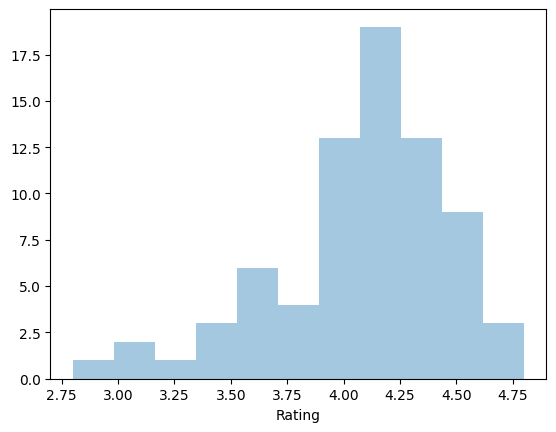

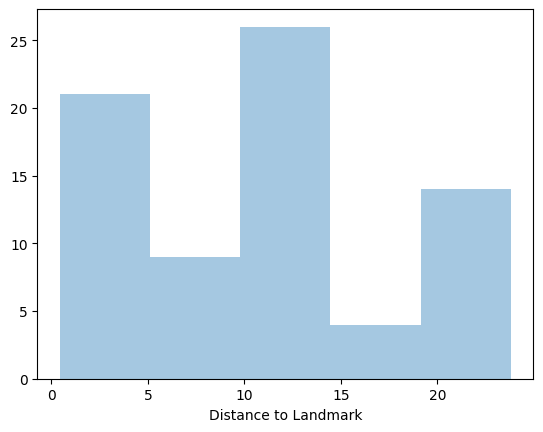

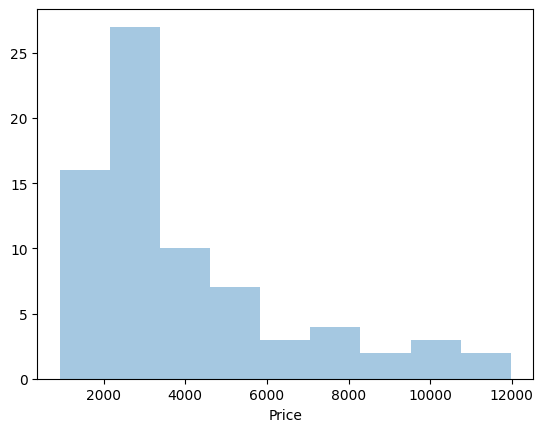

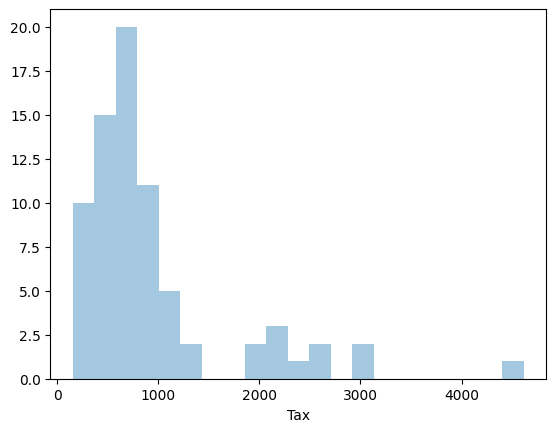

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
for j,i in enumerate(df.columns):
    if df[i].dtype == 'float':
        plt.figure(j)
        sns.distplot(df[i], kde= False)

## Now in order to check outliers in column we use 'Boxplot' as you can see below for 'Price' Column.

<Axes: xlabel='Price'>

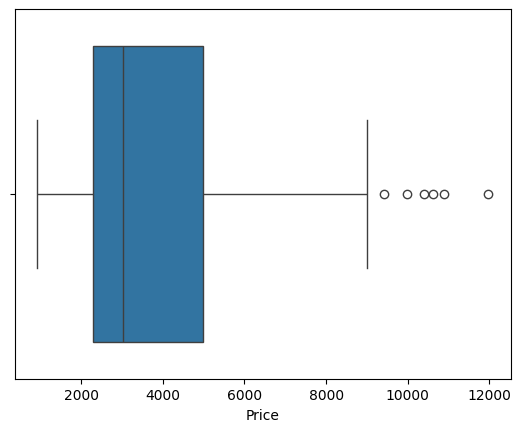

In [49]:
# Box plots
sns.boxplot(df['Price'], orient = 'h')

<Axes: xlabel='Rating'>

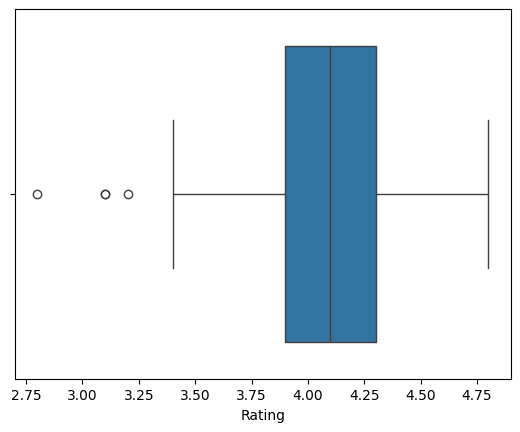

In [50]:
sns.boxplot(df['Rating'], orient = 'h')

## Below we have use groupby function in order to do aggrgation function count on 'Ratings'. So we can get to know how many times rating occurs.

<Axes: xlabel='Rating'>

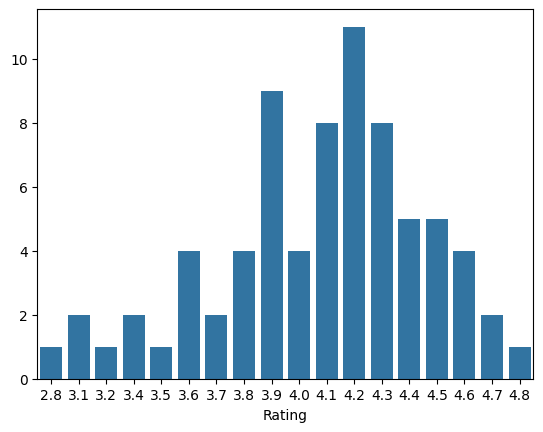

In [51]:
fig_x_y= df.groupby('Rating')['Rating'].count()
sns.barplot(x= fig_x_y.index, y= fig_x_y.values)

<Axes: xlabel='Rating Description'>

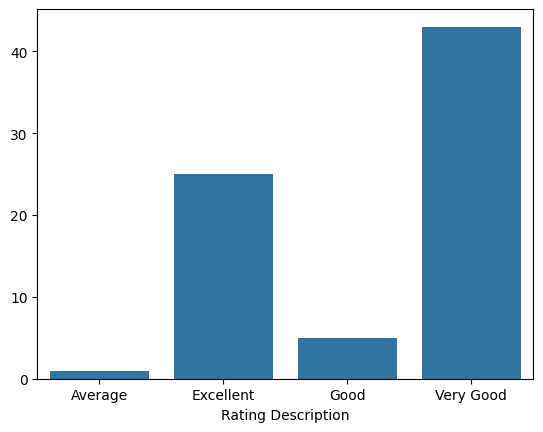

In [52]:
fig_x_y= df.groupby('Rating Description')['Rating Description'].count()
sns.barplot(x= fig_x_y.index, y=fig_x_y.values)

In [53]:
rating_desc= df['Rating Description'].unique()
def rating_to_nums(i):
    if i == 'Good':
        return 1
    elif i =='Average':
        return 0
    elif i =='Very Good':
        return 2
    elif i =='Excellent':
        return 3


<Axes: xlabel='Rating Description_numeric'>

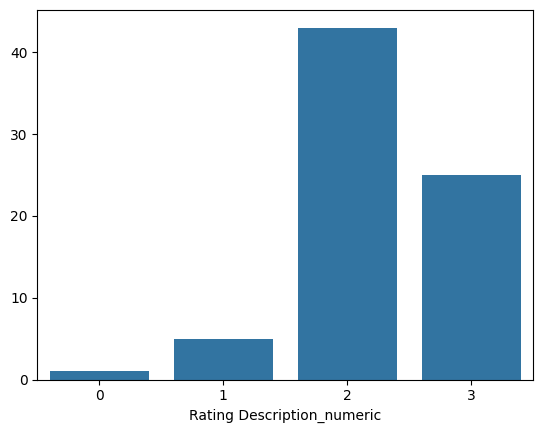

In [54]:
import seaborn as sns
df['Rating Description_numeric']= df['Rating Description'].apply(lambda x: rating_to_nums(x))
fig_x_y= df.groupby('Rating Description_numeric')['Rating Description_numeric'].count()
sns.barplot(x= fig_x_y.index, y=fig_x_y.values)

In [55]:
df['Rating Description'].apply(lambda x: rating_to_nums(x))

0     2
1     2
2     2
3     3
4     3
     ..
69    3
70    2
71    3
72    2
73    1
Name: Rating Description, Length: 74, dtype: int64

In [56]:
df['Rating Description']

0     Very Good
1     Very Good
2     Very Good
3     Excellent
4     Excellent
        ...    
69    Excellent
70    Very Good
71    Excellent
72    Very Good
73         Good
Name: Rating Description, Length: 74, dtype: object

## As you can find below we are also using 'Jointplot' in 'Price' and 'Rating' columns.

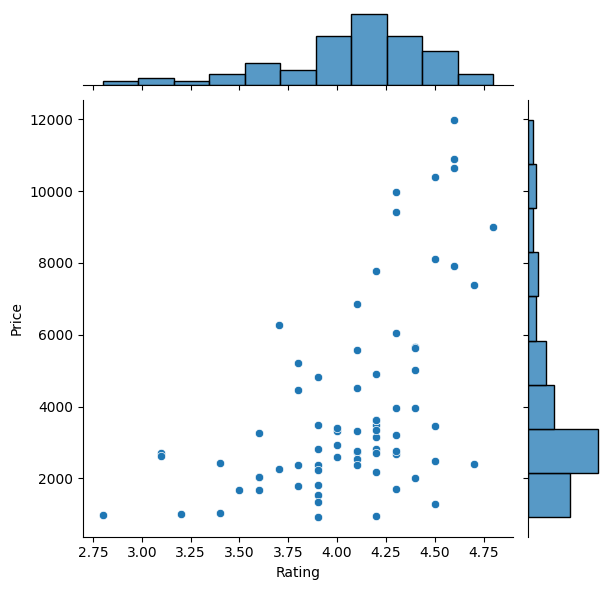

In [57]:
sns.jointplot(x= df['Rating'], y = df['Price'])

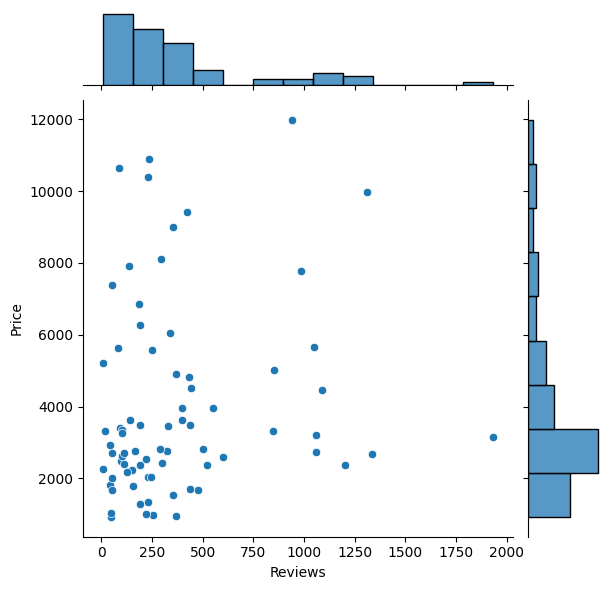

In [58]:
sns.jointplot(x= df['Reviews'], y = df['Price'])

## Here below we are also showing 3D graph in order to get idea about 'Price' of hotel as per 'Reviews' along with 'Rating' for that we are going to use 'replot' from seaborn.

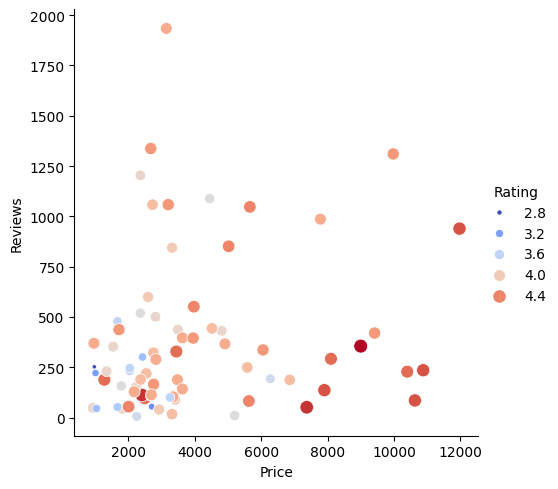

In [59]:
# 3D plots using hues
sns.relplot(
    data=df,
    x='Price', y= 'Reviews',
    size='Rating', sizes=(10, 100),
    hue='Rating',
    palette='coolwarm',
);

<Axes: xlabel='Price', ylabel='Rating Description'>

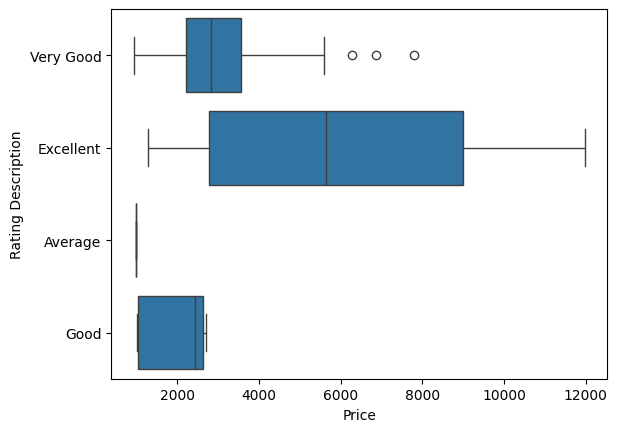

In [60]:
sns.boxplot(x= 'Price', y = 'Rating Description', data = df) #2D box plots

<Axes: xlabel='Price', ylabel='Rating Description'>

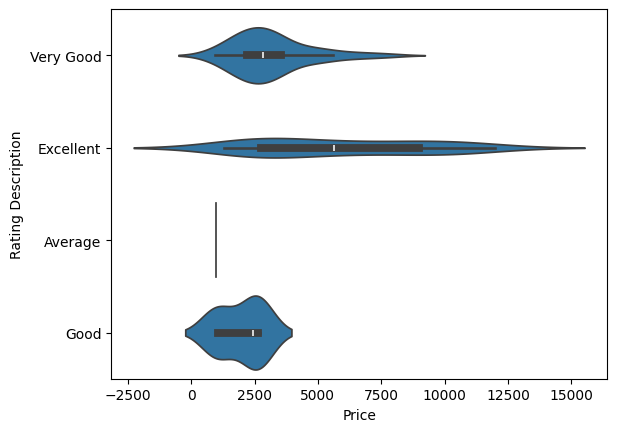

In [61]:
sns.violinplot(x= 'Price', y = 'Rating Description', data = df) #2D violin plots

## As we can see above we have used 'Violinplot' because with that we can get idea about distribution of dataset and also outliers as well.

<Axes: xlabel='Price', ylabel='Rating Description'>

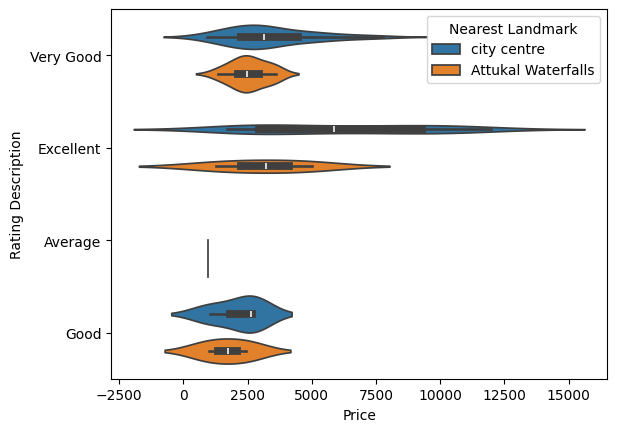

In [62]:
sns.violinplot(x= 'Price', y = 'Rating Description', data = df, hue = 'Nearest Landmark') #3D violin plots

<Axes: xlabel='Price', ylabel='Rating Description'>

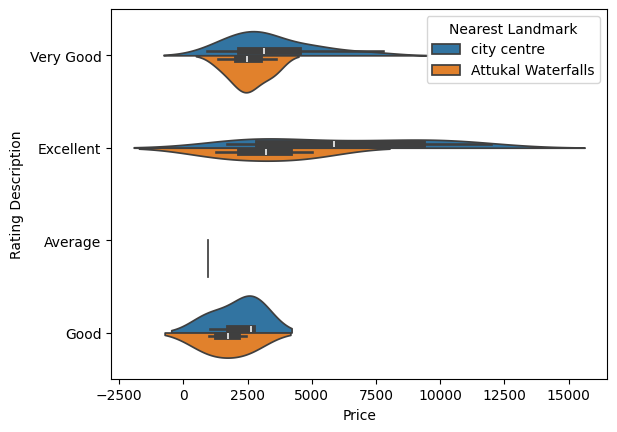

In [63]:
sns.violinplot(x= 'Price', y = 'Rating Description', data = df, hue = 'Nearest Landmark', split = True) #3D violin plots

In [64]:
# Pie charts (Data composition)
df['Rating Description']

0     Very Good
1     Very Good
2     Very Good
3     Excellent
4     Excellent
        ...    
69    Excellent
70    Very Good
71    Excellent
72    Very Good
73         Good
Name: Rating Description, Length: 74, dtype: object

## Here we are going to use 'Pie Chart' in order to get percentage of 'Rating Description'.

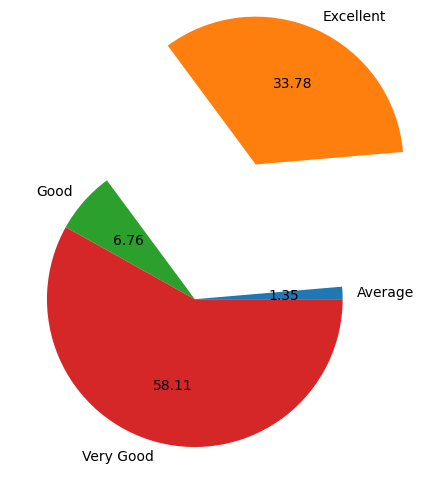

In [65]:
fig_x_y= df.groupby('Rating Description')['Rating Description'].count()
plt.pie(fig_x_y, labels= fig_x_y.index, autopct = '%.2f', explode = [0,1,0,0])
plt.show()

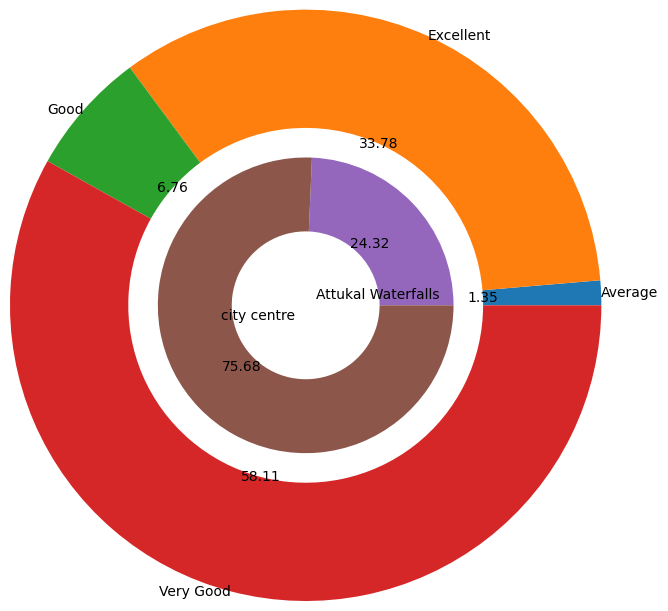

In [66]:
fig_x_y_lm= df.groupby('Nearest Landmark')['Nearest Landmark'].count()


plt.pie(fig_x_y, labels= fig_x_y.index, autopct = '%.2f', wedgeprops= {'width': 0.8}, radius = 2, labeldistance= 1)
plt.pie(fig_x_y_lm, labels= fig_x_y_lm.index, autopct = '%.2f', wedgeprops= {'width': 0.5}, radius = 1, labeldistance= 0.1)
plt.show()
### Try to get counts as well

## Also we are going to use 'Scatterplot' inorder to chek relationship between 'Tax' and 'Price' column'.

<Axes: xlabel='Price', ylabel='Tax'>

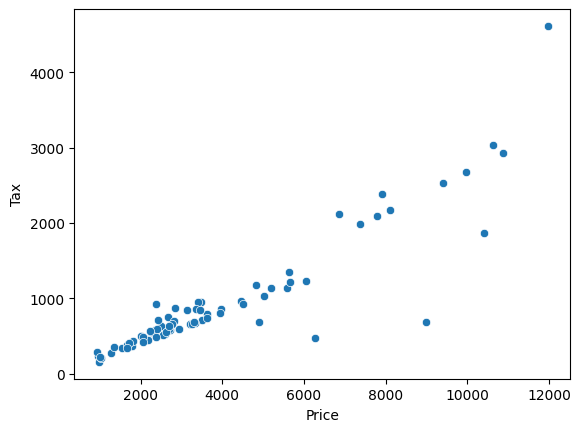

In [67]:
# Scatterplot
sns.scatterplot(x= 'Price', y= 'Tax', data = df)

In [68]:
# Lets answer few questions- Business standpoint.
# Lets say you are a Business analyst / data analyst. A hotel xyz comes to you and says.
# I am not getting customers. How should I set the price for my property? Say hotel- Nature Zone Jungle Resort
# There can be multiple questions that can be answered / is required to be answered to solve a Business problem which
# will require drilling down to data level analysis
df[df['Hotel Name'] == "Nature Zone Jungle Resort"]

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax,Rating Description_numeric
72,Nature Zone Jungle Resort,4.1,Very Good,187,4,Pallivasal,city centre,6.6,6862.0,2124.0,2


In [69]:
def dist_check(x):
    if x <= 6:
        return "Very Near (0 Km - 6 Km]"
    elif x <= 12:
        return "Near (6 Km - 12 Km]"
    elif x <= 20:
        return "Far (12 Km - 20 Km]"
    else:
        return "Too Far"
def rating_check(x):
    if x >= 4.1:
        return "Better Ratings"
    else:
        return "Worser Ratings"


<Axes: xlabel='Price', ylabel='Nearness_to_landmark'>

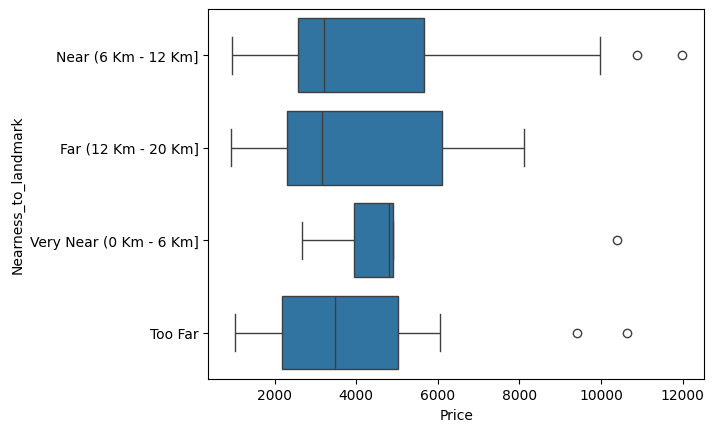

In [70]:
df['Nearness_to_landmark']= df['Distance to Landmark'].apply(lambda x: dist_check(x))
sns.boxplot(x= 'Price', y= 'Nearness_to_landmark', data = df[df['Nearest Landmark']== "city centre"])


<Axes: xlabel='Price', ylabel='Nearness_to_landmark'>

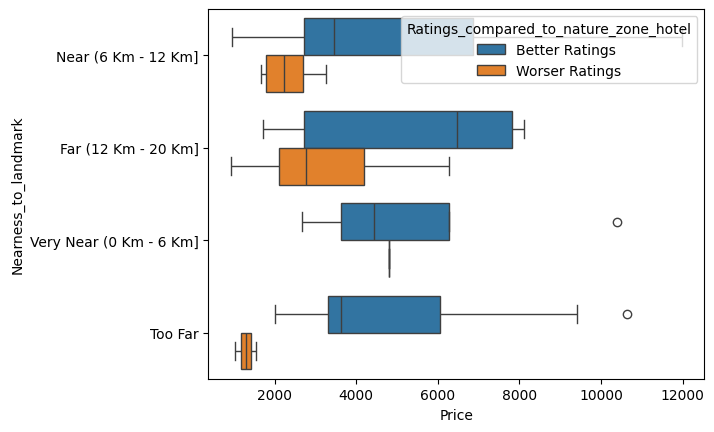

In [71]:
df['Ratings_compared_to_nature_zone_hotel']= df['Rating'].apply(lambda x: rating_check(x))
sns.boxplot(x= 'Price', y= 'Nearness_to_landmark', data = df[df['Nearest Landmark']== "city centre"], hue = 'Ratings_compared_to_nature_zone_hotel')